[2.47664845e+03 7.61423396e+02 1.10541965e+03 5.05029394e-06
 6.05452486e+09 8.31695945e+13 4.90099551e+11]
[2.47262999e+03 7.65663157e+02 1.08331453e+03 5.05108849e-06
 6.10352060e+09 1.08100596e+14 4.80395171e+11]
[2.46801687e+03 7.70657089e+02 1.05905409e+03 5.05247735e-06
 6.14859813e+09 1.34177478e+14 4.70882974e+11]
[2.46286357e+03 7.76358017e+02 1.03297519e+03 5.05454516e-06
 6.19079279e+09 1.60893570e+14 4.61559152e+11]
[2.45721029e+03 7.82730330e+02 1.00538715e+03 5.05736940e-06
 6.23081214e+09 1.87832077e+14 4.52419974e+11]
[2.45108580e+03 7.89747348e+02 9.76575331e+02 5.06102196e-06
 6.26916339e+09 2.14651176e+14 4.43461782e+11]
[2.44450953e+03 7.97389281e+02 9.46803764e+02 5.06557020e-06
 6.30622442e+09 2.41072175e+14 4.34680990e+11]
[2.43749342e+03 8.05641600e+02 9.16316922e+02 5.07107792e-06
 6.34228567e+09 2.66869951e+14 4.26074087e+11]
[2.43004332e+03 8.14493705e+02 8.85341019e+02 5.07760598e-06
 6.37757631e+09 2.91865097e+14 4.17637626e+11]
[2.42216032e+03 8.23937795e+

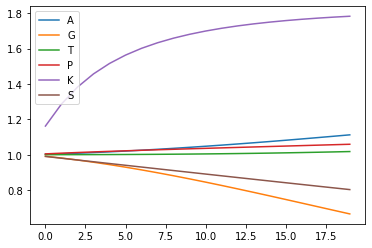

In [1]:
from Envs.cglobal import DynEnv
from Learning.agents import agent, ReplayBuffer
from tqdm import tqdm
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
env = DynEnv()
action_dim = 2**env.action_number
state_dim = env.observation_space

In [3]:
dqn = agent(state_dim, action_dim)
memory = ReplayBuffer(10000000)

In [4]:
def plot(frame_idx, rewards):
    
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('frame %s. reward: %s' % (frame_idx, rewards[-1]))
    plt.plot(rewards)
    plt.show()

In [5]:
BATCH_SIZE = 128
TARGET_UPDATE = 100
MAX_EPISODES = 5000
MAX_STEPS = 1000
TAU = 0.001

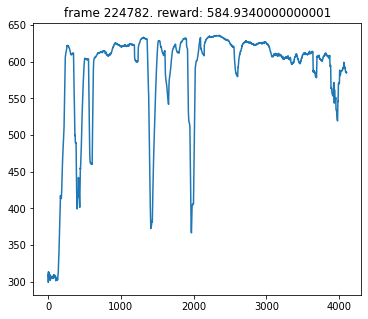

 ... (more hidden) ...


 ep_length:  55.18

 actions:  [0, 4, 4, 4, 4, 4, 3, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5]


 ... (more hidden) ...


KeyboardInterrupt: 

In [6]:
rewards = []
mean_rewards = []
frame_idx = 0
ep_len = []
actions = np.zeros(action_dim)

for episodes in tqdm(range(MAX_EPISODES)):
    state = env.reset()
    episode_reward = 0
    trajectory = []
    for steps in range(MAX_STEPS):
        if episodes>50:
            action = (dqn.get_action(state))
        else:
            action = np.random.choice(action_dim)
            
        next_state, reward, done, = env.step(action)
        
        episode_reward += reward
        
        memory.push(state, action, reward, next_state, done)
        
        state = next_state
        
        frame_idx += 1 
        actions[action] += 1
        trajectory.append(int(action))
        
        if memory.__len__() > BATCH_SIZE:
            sample = memory.sample(BATCH_SIZE)
            dqn.update(sample)
        if done:
            break
            
    ep_len.append(steps)       
    rewards.append(episode_reward)
    mean_rewards.append(np.mean(rewards[-50:]))
#     if episodes % TARGET_UPDATE == 0:
#         dqn.target_net.load_state_dict(dqn.policy_net.state_dict()) 
        
    if frame_idx % 100:
        plot(frame_idx, mean_rewards)
        if frame_idx%1000:
            print('\n ep_length: ',np.mean(ep_len[-50:]))
            print('\n actions: ', trajectory)